In [ ]:
!pip install pandas numpy sklearn mlrose_hiive mlrose seaborn

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose_hiive as mlrose
import mlrose as mlrose_old
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import time

from mlrose_hiive.algorithms.decay import GeomDecay


#Random State
rs = 614

In [ ]:
class Data():
    def dataAllocation(self, path):
        df = pd.read_csv(path)
        x_data = df.iloc[:, :-1]
        y_data = df.iloc[:, -1 ]
        return x_data,y_data

    def trainSets(self,x_data,y_data):
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = rs, shuffle = True)
        return x_train, x_test, y_train, y_test

In [ ]:
dataset = Data()
x1_data,y1_data = dataset.dataAllocation('pima-indians-diabetes.csv')
x1_train, x1_test, y1_train, y1_test = dataset.trainSets(x1_data,y1_data)
scaler = StandardScaler()
scaled_x1_train = scaler.fit_transform(x1_train)
scaled_x1_test = scaler.transform(x1_test)

In [ ]:
algorithms = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']

In [ ]:
def rhc(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.random_hill_climb(problem_fit, max_attempts=100, max_iters= max_iters, restarts=10, random_state = rs)[1]
    return [max_iters, "random_hill_climb", problem_name,fitness_score, time.time()-start]

def sa(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.simulated_annealing(problem_fit, max_attempts=100, max_iters= max_iters, random_state = rs)[1]
    return [max_iters, "simulated_annealing", problem_name,fitness_score, time.time()-start]

def ga(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.genetic_alg(problem_fit, max_attempts=100, max_iters= max_iters, pop_size= 200, mutation_prob=0.1, random_state = rs)[1]
    return [max_iters, "genetic_alg", problem_name,fitness_score, time.time()-start]

def mimic(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose_old.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=max_iters, curve=False, random_state=rs, fast_mimic=True)[1]
    return [max_iters, "mimic", problem_name,fitness_score, time.time()-start]

fitness = mlrose.FlipFlop()
results = []
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
problems_name = ["Flip Flop", "One Max", "Max-K Color"]

fitness_functions = [mlrose.FlipFlop(), mlrose.OneMax(), mlrose.MaxKColor(edges)]

problems = [mlrose.DiscreteOpt(length = 100, fitness_fn = fitness_function, maximize=True, max_val = 2) for fitness_function in fitness_functions]
for j in range(len(problems)):
    for i in range(0, 3000, 100):
        results.append(rhc(problems[j], problems_name[j], max_iters= i))
        results.append(sa(problems[j], problems_name[j], max_iters= i))
        results.append(ga(problems[j], problems_name[j], max_iters= i))
        results.append(mimic(problems[j], problems_name[j], max_iters= i))
        print(i, end=" ")



0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 

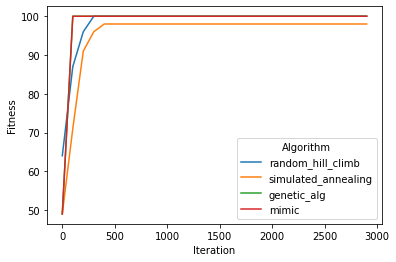

In [ ]:
df = pd.DataFrame(results, columns=["Iteration", "Algorithm", "Problem","Fitness", "Time"])
sns.lineplot(data=df[df['Problem']==problems_name[1]], x="Iteration", y="Fitness", hue="Algorithm")
df.to_csv("problems_solution.csv", index=False)

In [ ]:
df.head(5)

,Iteration,Algorithm,Problem,Fitness,Time
0,0,random_hill_climb,Flip Flop,58.0,0.007534
1,0,simulated_annealing,Flip Flop,47.0,0.000342
2,0,genetic_alg,Flip Flop,47.0,0.057126
3,0,mimic,Flip Flop,47.0,0.057995
4,100,random_hill_climb,Flip Flop,77.0,0.367951


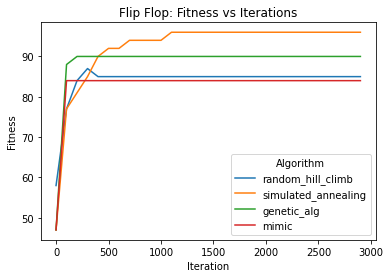

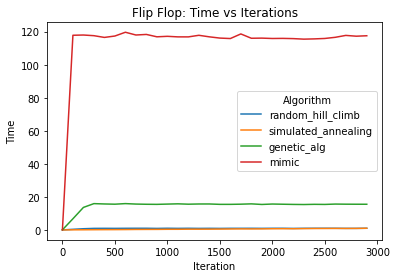

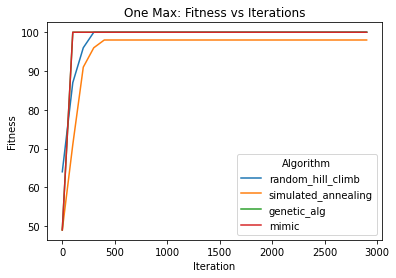

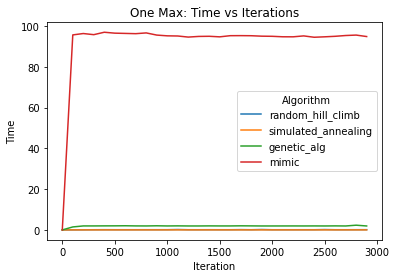

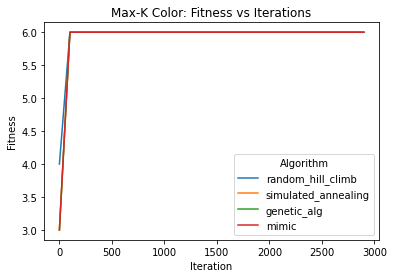

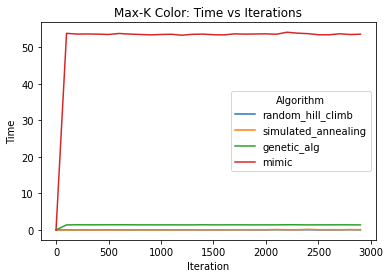

In [ ]:
import matplotlib.pyplot as plt

for problem in problems_name:
  plt.figure()
  sns.lineplot(data=df[df['Problem']==problem], x="Iteration", y="Fitness", hue="Algorithm").set_title(problem+ ": Fitness vs Iterations")
  plt.figure()
  sns.lineplot(data=df[df['Problem']==problem], x="Iteration", y="Time", hue="Algorithm").set_title(problem+  ": Time vs Iterations")

In [ ]:
df.groupby(['Algorithm', 'Problem'])['Fitness'].max()

Algorithm            Problem    
genetic_alg          Flip Flop       90.0
                     Max-K Color      6.0
                     One Max        100.0
mimic                Flip Flop       84.0
                     Max-K Color      6.0
                     One Max        100.0
random_hill_climb    Flip Flop       87.0
                     Max-K Color      6.0
                     One Max        100.0
simulated_annealing  Flip Flop       96.0
                     Max-K Color      6.0
                     One Max         98.0
Name: Fitness, dtype: float64

In [ ]:
df.groupby(['Algorithm', 'Problem'])['Time'].max()

Algorithm            Problem    
genetic_alg          Flip Flop       15.921236
                     Max-K Color      1.415187
                     One Max          2.315717
mimic                Flip Flop      119.627004
                     Max-K Color     54.076801
                     One Max         96.989524
random_hill_climb    Flip Flop        1.003749
                     Max-K Color      0.064700
                     One Max          0.200827
simulated_annealing  Flip Flop        1.010916
                     Max-K Color      0.152520
                     One Max          0.023674
Name: Time, dtype: float64

In [ ]:
df[df['Problem']=='Flip Flop'].groupby(['Algorithm', 'Problem'])['Time'].mean()

Algorithm            Problem  
genetic_alg          Flip Flop     14.714347
mimic                Flip Flop    113.046134
random_hill_climb    Flip Flop      0.904936
simulated_annealing  Flip Flop      0.504834
Name: Time, dtype: float64

In [ ]:
df[df['Problem']=='One Max'].groupby(['Algorithm', 'Problem'])['Time'].mean()

Algorithm            Problem
genetic_alg          One Max     1.893509
mimic                One Max    92.227070
random_hill_climb    One Max     0.102398
simulated_annealing  One Max     0.011816
Name: Time, dtype: float64

In [ ]:
df[df['Problem']=='Max-K Color'].groupby(['Algorithm', 'Problem'])['Time'].mean()

Algorithm            Problem    
genetic_alg          Max-K Color     1.345678
mimic                Max-K Color    51.772952
random_hill_climb    Max-K Color     0.030789
simulated_annealing  Max-K Color     0.045278
Name: Time, dtype: float64

Text(0.5, 1.0, 'Max-K Color: Fitness vs Iterations')

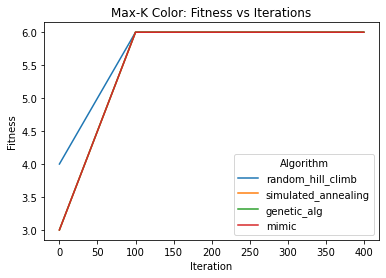

In [ ]:
sns.lineplot(data=df[(df['Problem']=='Max-K Color') & (df['Iteration'] < 500)], x="Iteration", y="Fitness", hue="Algorithm").set_title(problem+ ": Fitness vs Iterations")

Text(0.5, 1.0, 'Max-K Color: Time vs Iterations')

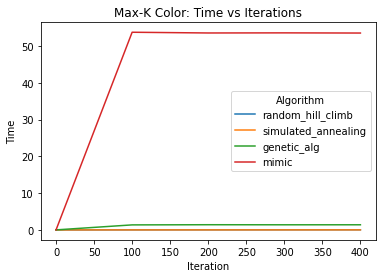

In [ ]:
sns.lineplot(data=df[(df['Problem']=='Max-K Color') & (df['Iteration'] < 500)], x="Iteration", y="Time", hue="Algorithm").set_title(problem+ ": Time vs Iterations")